In [73]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import seaborn as sns 
sns.set(
    style="whitegrid",    # Стиль с белым фоном и сеткой
    rc={"figure.figsize": (16, 6)}  # Размер графиков
)
import matplotlib.pyplot as plt

На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов \
•	В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные \
•	Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.\
Задания:\
1.	Выберите метод, который предположительно подойдет в первом вопросе.\
2.	Проверьте, являются ли дисперсии внутри групп гомогенными.\
3.	Проведите тест на нормальность распределения.\
4.	Сравните средние в представленных группах.\
5.	Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. \
6.	Примите решение: какие картинки в итоге будем использовать?\
7.	Выберите метод для второго теста.\
8.	Визуализируйте распределение events для контрольной и тестовой групп. \
9.	Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. \
10.	- 11.Выберите формулу для модели, проведите тест.\
Описание данных\
5_task_1:\
•	id – id клиента в эксперименте\
•	group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)\
•	events – сколько блюд суммарно было заказано за период\
5_task_2:\
•	id – id клиента в эксперименте\
•	segment – сегмент (high/low)\
•	group – вид кнопки (control – старая версия, test – новая версия)\
•	events – сколько блюд суммарно было заказано за период\



In [28]:
df_1 = pd.read_csv('C:/Users/spit/Desktop/math/5/mini_project/5_task_1.csv')

In [29]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [30]:
df_1['group'].unique()

array(['A', 'B', 'C'], dtype=object)

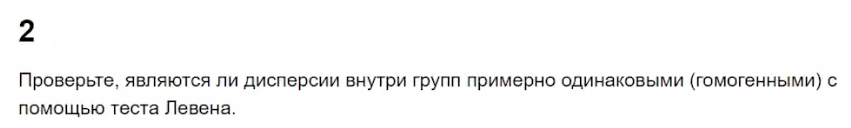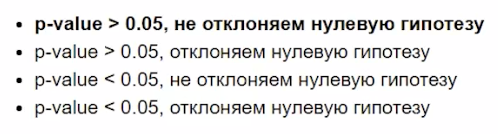

In [31]:
pg.homoscedasticity(data=df_1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


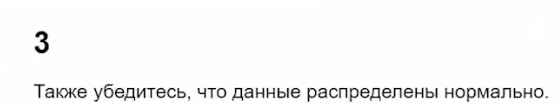
ДАНННЫЕ РАСПРЕДЕЛЕНЫ НОРМАЛЬНО

In [32]:
pg.normality(df_1, dv='events', group='group', method='normaltest')

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

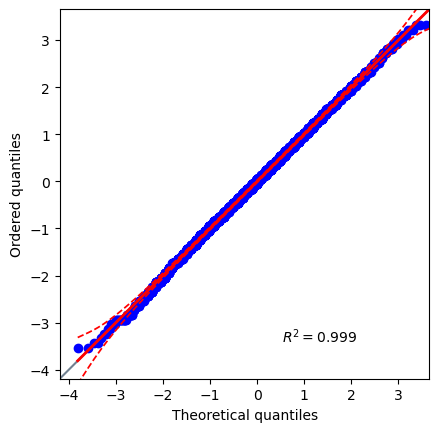

In [33]:
pg.qqplot(df_1.query("group == 'A'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

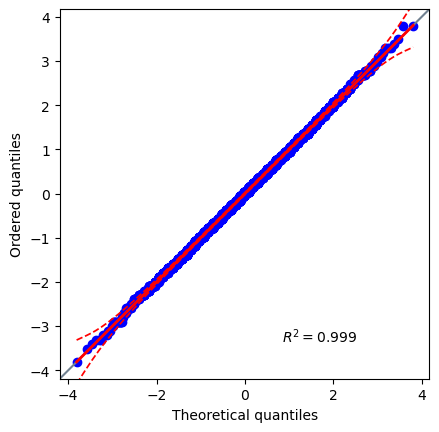

In [34]:
pg.qqplot(df_1.query("group == 'B'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

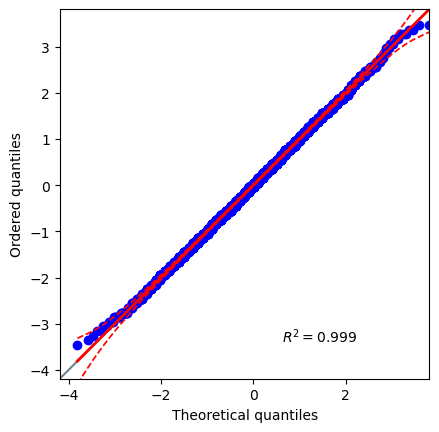

In [35]:
pg.qqplot(df_1.query("group == 'C'").events)

#### Сравните средние в представленных группах.

In [36]:
pg.anova(
    data=df_1,
    dv='events',
    between='group'
)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


Данные стат значемы. \
Группы различаются.

#### Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия.

In [37]:
pg.pairwise_tukey(data=df_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


Все группы стат значемо различаются

In [38]:
# если нас волнует неравенство дисперсий

pg.pairwise_gameshowell(data=df_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,6.412648e-13,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,6.349254e-12,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.000000e+00,1.024138


#### Примите решение: какие картинки в итоге будем использовать?

<Axes: xlabel='group', ylabel='events'>

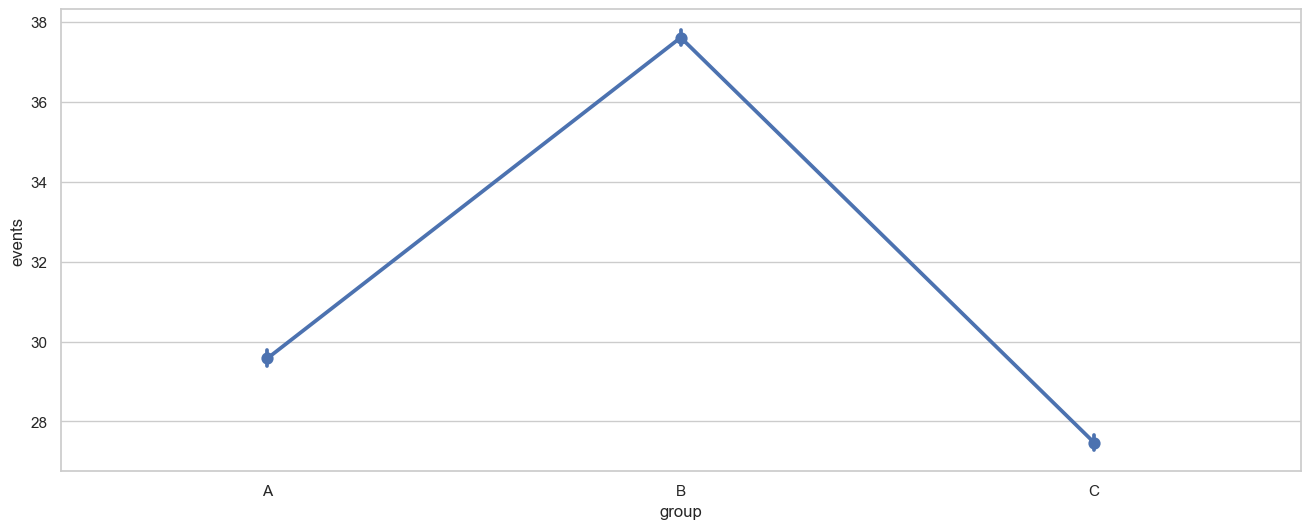

In [76]:
sns.pointplot(data=df_1, y='events', x='group')

Использовать будем B

In [40]:
df_2 = pd.read_csv('C:/Users/spit/Desktop/math/5/mini_project/5_task_2.csv')

In [41]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


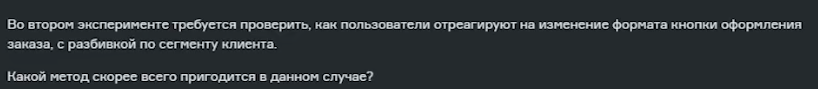

#### Выберите метод для второго теста.
Многофакторный дисперсионный анализ

#### Визуализируйте распределение events для контрольной и тестовой групп.

<Axes: xlabel='events', ylabel='Count'>

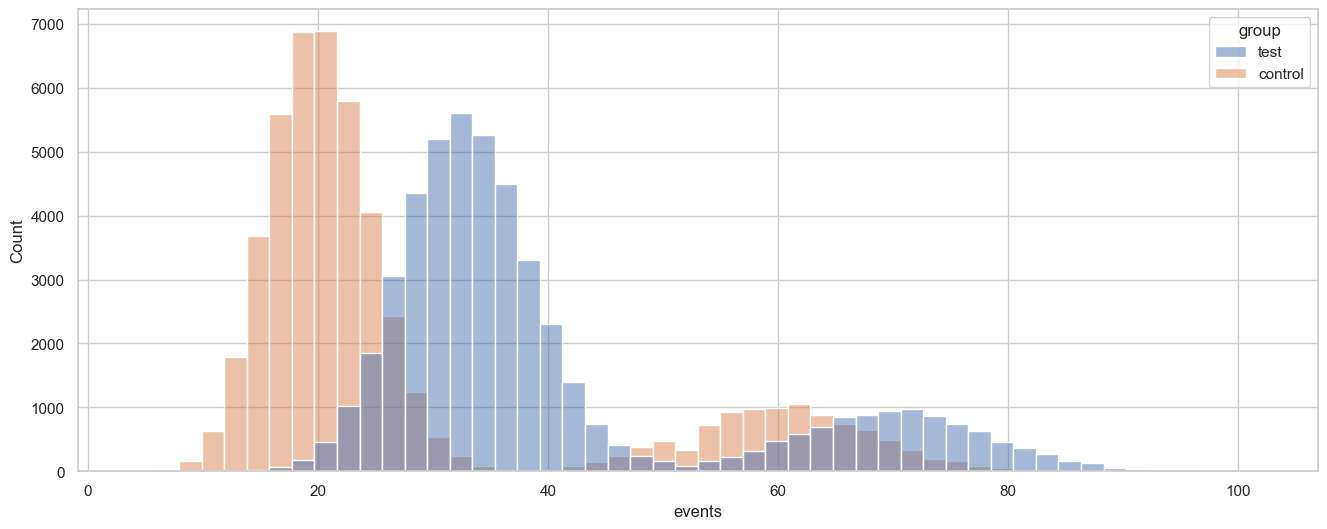

In [75]:
sns.histplot(data=df_2, x='events', hue='group', bins=50)

Данные бимодальные

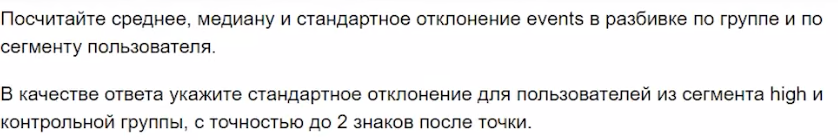
7.81

In [52]:
df_2.groupby(['segment','group']).agg({'events':['mean', 'median', 'std']}).round(2)

events             
                  mean median   std
segment group                      
high    control  59.97   60.0  7.81
        test     69.94   70.0  8.40
low     control  20.03   20.0  4.47
        test     33.03   33.0  5.72

C:\Users\spit\AppData\Local\Temp\ipykernel_9212\1744617328.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\spit\AppData\Local\Temp\ipykernel_9212\1744617328.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




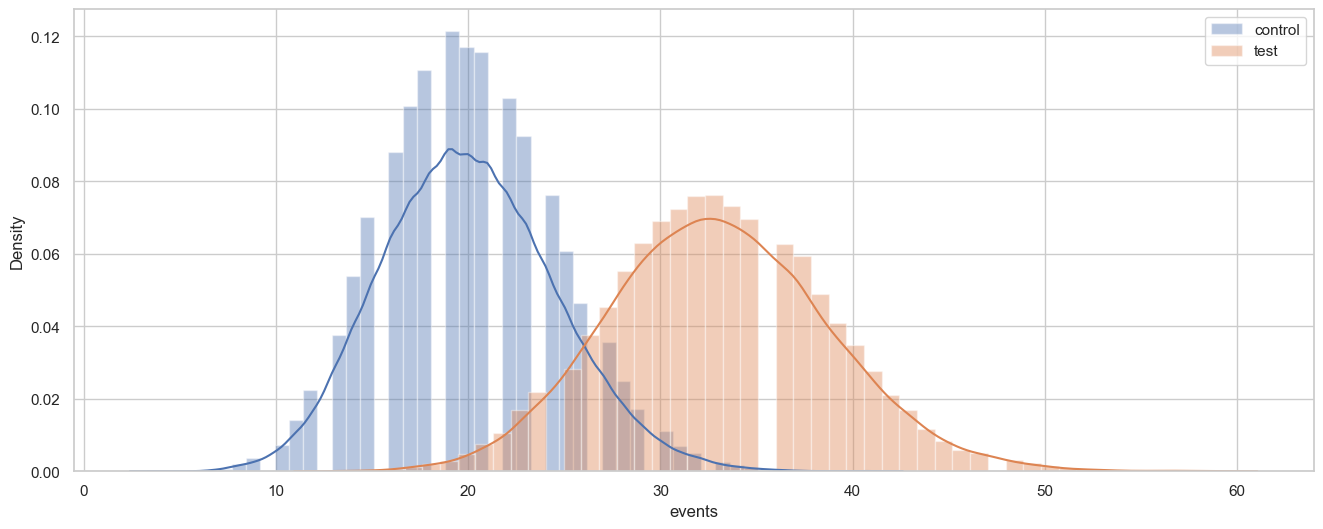

In [74]:
sns.distplot(df_2.query("segment == 'low' & group == 'control'").events, label='control')
sns.distplot(df_2.query("segment == 'low' & group == 'test'").events, label='test')
plt.legend()

C:\Users\spit\AppData\Local\Temp\ipykernel_9212\3588572245.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\spit\AppData\Local\Temp\ipykernel_9212\3588572245.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




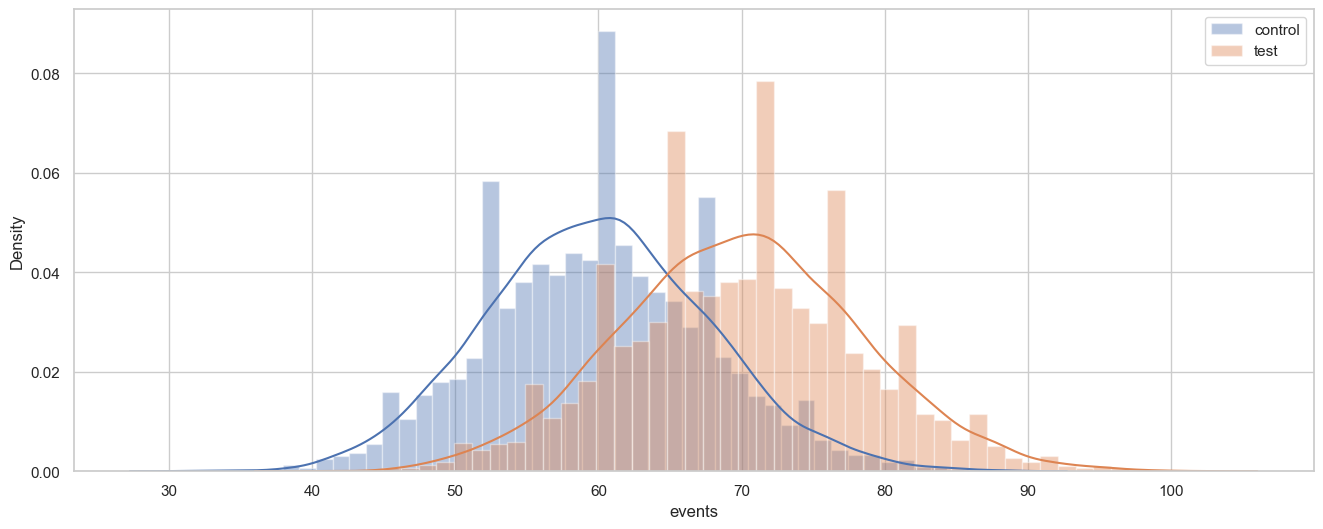

In [77]:
sns.distplot(df_2.query("segment == 'high' & group == 'control'").events, label='control')
sns.distplot(df_2.query("segment == 'high' & group == 'test'").events, label='test')
plt.legend()

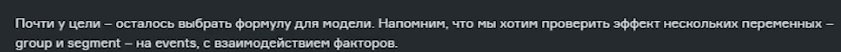

In [81]:
#statsmodels
model = smf.ols(formula='events ~ segment + group + segment:group', data=df_2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377485,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [82]:
#пингвин
pg.anova(data=df_2,
    dv='events',
    between=['segment','group'])

,Source,SS,DF,MS,F,p-unc,np2
0,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
1,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
2,segment * group,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


<Axes: xlabel='group', ylabel='events'>

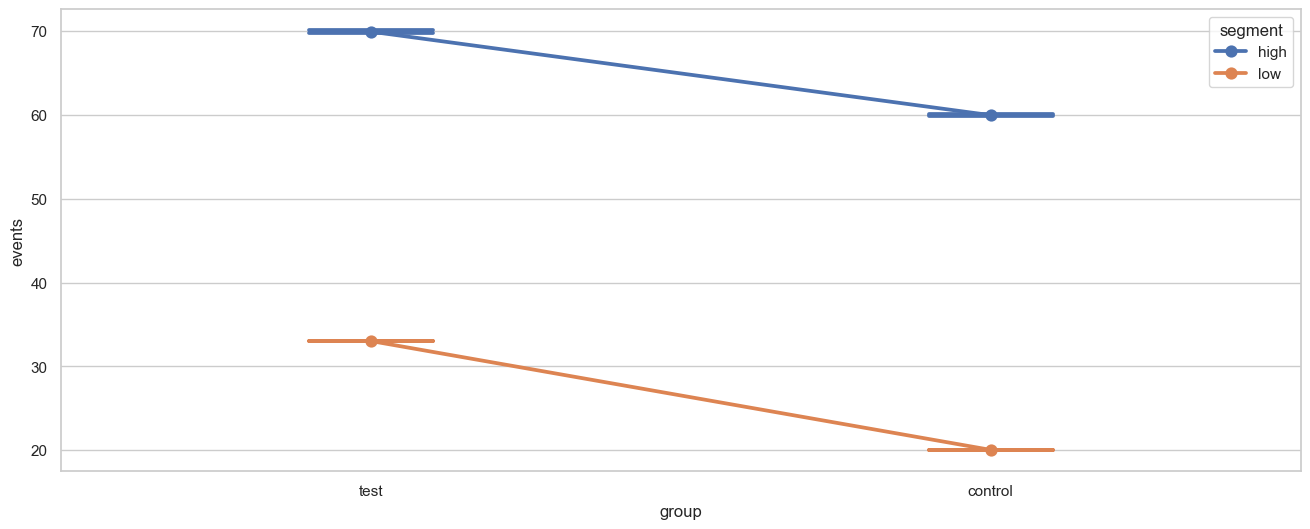

In [86]:
sns.pointplot(data = df_2, x = 'group', y = 'events', hue='segment',  capsize=0.2)

In [89]:
df_2['combination'] = df_2.group + "\\" + df_2.segment

In [91]:
pg.pairwise_tukey(data=df_2, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control\high,control\low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,7.521612
1,control\high,test\high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.228989
2,control\high,test\low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.350026
3,control\low,test\high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-9.091140
4,control\low,test\low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.530414
5,test\high,test\low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,5.814008


Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой \
Разница между control/high и test/high состоявляет окло 10 \
Разница между control/low и test/low состоявляет окло 13

Фактор group оказался значимым, фактор segment - значимым, их взаимодействие - значимо. Судя по графику для всех групп среднее значение events увеличилось, поэтому решение: выкатываем новую версию